# Import data and path of the variables

       obs       oil       inf    growth        pa          e        pb
0  1973M01  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000
1  1973M02 -0.091286  0.201961  0.648842 -2.673726   0.401101 -0.954040
2  1973M03 -0.302287  0.115846  0.147766 -0.230488  -3.127771 -2.649218
3  1973M04  0.323823 -0.703234  0.312651 -2.776542 -11.293834 -5.393480
4  1973M05  0.236872 -0.797623  0.182704 -7.437957 -14.532341 -6.434252


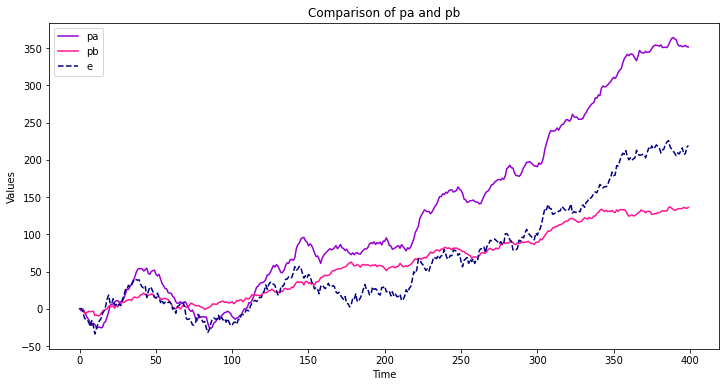

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM, select_order


data = pd.read_csv("C:/Users/gabri/OneDrive/Desktop/Pillitteri_Gabriele.csv")
print(data.head())

# Plot of the 2 series
plt.figure(figsize=(12, 6))
plt.plot(data['pa'], label='pa', color='darkviolet')
plt.plot(data['pb'], label='pb', color='deeppink')
plt.plot(data['e'], label='e', color='navy',linestyle='--')
plt.title('Comparison of pa and pb')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Checking for Stationarity

In [8]:
adf_pa = adfuller(data['pa'])
adf_pb = adfuller(data['pb'])
adf_e = adfuller(data['e'])

print('ADF Statistic for pA:', adf_pa[0], 'p-value:', adf_pa[1])
print('ADF Statistic for pB:', adf_pb[0], 'p-value:', adf_pb[1])
print('ADF Statistic for eAB:', adf_e[0], 'p-value:', adf_e[1])

ADF Statistic for pA: 0.18495438689998173 p-value: 0.9714049931846401
ADF Statistic for pB: 0.28157226786006057 p-value: 0.976483056017014
ADF Statistic for eAB: 0.6157080098284425 p-value: 0.9879964726973053


# Testing for Co-integration

In [9]:
coint_data = data[['pa', 'pb', 'e']]

# Johansen cointegration test
johansen_test = coint_johansen(coint_data, det_order = 0, k_ar_diff = 1)

# Trace statistics
trace_stats = johansen_test.lr1
crit_values = johansen_test.cvt
max_eig_stats = johansen_test.lr2
critical_values_max_eig = johansen_test.cvm

# Print the results
print("Eigenvalues:\n", johansen_test.eig)
print("Trace Statistics:\n", trace_stats)
print("Critical Values Trace (90%, 95%, 99%):\n", crit_values)
print("Max-Eigen Statistic:\n", max_eig_stats)
print("Critical Values Max-Eig (90%, 95%, 99%):\n", critical_values_max_eig)

Eigenvalues:
 [4.00308635e-01 1.08176747e-02 2.80655284e-05]
Trace Statistics:
 [2.07853440e+02 4.34006148e+00 1.11702370e-02]
Critical Values Trace (90%, 95%, 99%):
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max-Eigen Statistic:
 [2.03513379e+02 4.32889124e+00 1.11702370e-02]
Critical Values Max-Eig (90%, 95%, 99%):
 [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


# VECM Model 

In [10]:

# Order selecting
order_results = select_order(coint_data, maxlags = 10, deterministic = "ci")
print(order_results.summary())

# fitting the VECM model
vecm_model = VECM(coint_data, coint_rank = 1, k_ar_diff = 1)  # coint_rank=1 b
vecm_fit = vecm_model.fit()
print(vecm_fit.summary())

# Getting the coefficients of the error correction term
ecm_coefficients = vecm_fit.alpha

# Summary of the ECM coefficients
print("ECM coefficients:"
    "\nPA (pa):", ecm_coefficients[0][0],
    "\nEAB (e):", ecm_coefficients[1][0],
    "\nPB (pb):", ecm_coefficients[2][0])

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       5.624*      5.777*      277.0*      5.685*
1        5.661       5.905       287.4       5.758
2        5.694       6.030       297.0       5.827
3        5.721       6.149       305.3       5.891
4        5.741       6.261       311.5       5.947
5        5.747       6.359       313.4       5.990
6        5.765       6.468       319.1       6.044
7        5.800       6.594       330.3       6.115
8        5.825       6.711       338.9       6.176
9        5.862       6.840       351.7       6.249
10       5.889       6.959       361.6       6.313
--------------------------------------------------
Det. terms outside the coint. relation & lagged endog. parameters for equation pa
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

# Diagnostic of the residuals

In [11]:
residuals = vecm_fit.resid
residual_diagnostic = vecm_fit.test_whiteness(nlags = 1, signif = 0.05).summary()
print(residual_diagnostic) #BOIADEH

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 1 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
        0.3743            nan     NAN -3
----------------------------------------
